# <font color='blue'>Prediction of Selling Price of a Car</font>

## Enoch A. Akinpelu (PhD, CEng, MIChemE)

# Objectives

 - To explore dataset on cars
 - To predict the selling price of any given car
 - To build a model and determine the accuracy score of the model
 - To visualize the predicted and actual selling price of the car

## Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Load data
car = pd.read_csv('car data.csv')

## Exploratory Data Analysis

In [3]:
# Peruse first 5 rows
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### <font color='red'>There are no missing value in the car dataset</font>

In [5]:
car.shape

(301, 9)

### <font color='red'>There are 301 rows and 9 columns in the car dataset</font>

In [6]:
# Information about the data
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Statistical analysis of the data
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
car.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


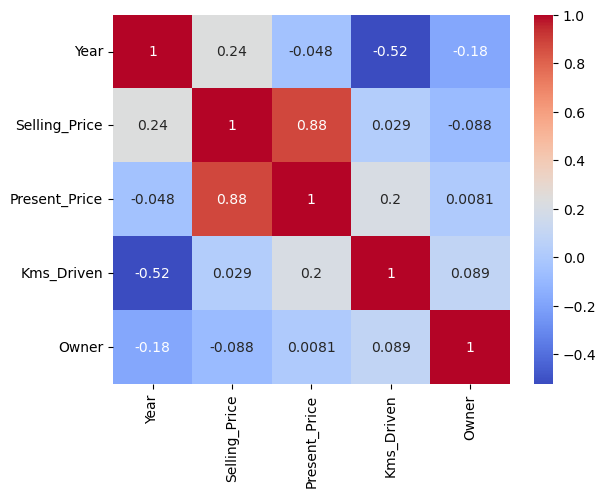

In [9]:
sns.heatmap(car.corr(),annot=True, cmap='coolwarm');

### <font color='red'>Only the present price has a high positive correlation with the car selling price</font>

In [10]:
car['Car_Name'].value_counts().head()

city             26
corolla altis    16
verna            14
fortuner         11
brio             10
Name: Car_Name, dtype: int64

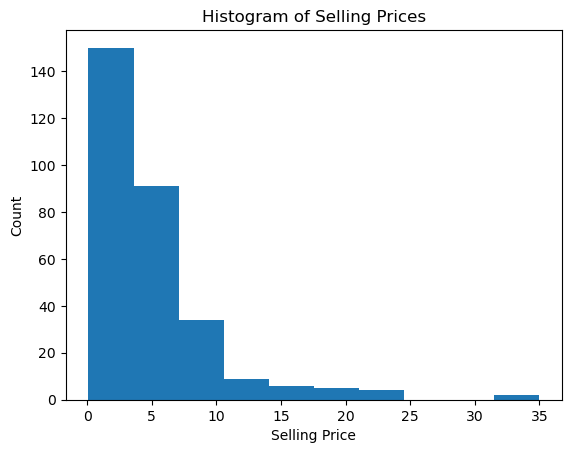

In [11]:
plt.hist(car["Selling_Price"], bins=10)
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.title("Histogram of Selling Prices")
plt.show()

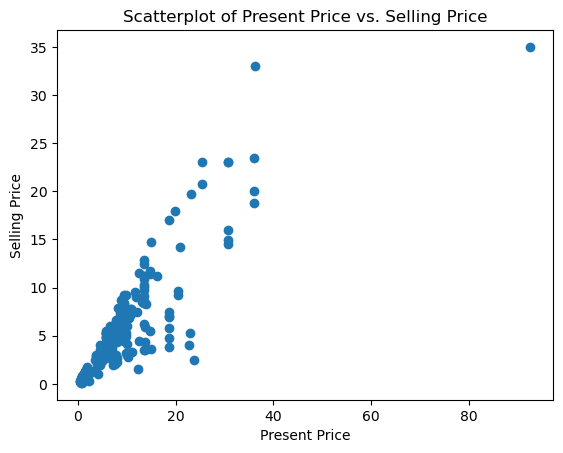

In [12]:
# Plotting a scatterplot of Present_Price vs. Selling_Price
plt.scatter(car["Present_Price"], car["Selling_Price"])
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.title("Scatterplot of Present Price vs. Selling Price")
plt.show()

In [13]:
fuel_counts = car["Fuel_Type"].value_counts()
fuel_counts

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

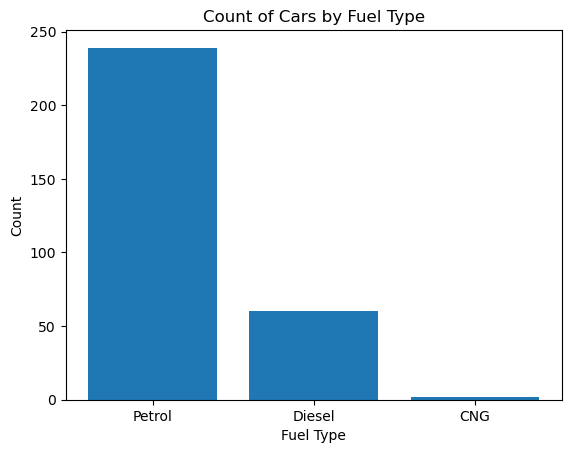

In [14]:
# Plotting a bar chart of the count of cars by Fuel_Type
plt.bar(fuel_counts.index, fuel_counts.values)
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.title("Count of Cars by Fuel Type")
plt.show()

## Inferences

- <font color='red'>Most of the cars used petrol fuel type</font>
- <font color='red'>There is linear relationship between selling price and present price of car with a positive correlation</font>
- <font color='red'>There are no missing value in the dataset</font>
- <font color='red'>There are 301 rows and 9 columns in the dataset</font>

## Data Pre-processing

In [15]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

In [16]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [17]:
# Apply label Encoder
carname_label= labelencoder.fit_transform(car.Car_Name)
fuel_label=labelencoder.fit_transform(car.Fuel_Type)
seller_label=labelencoder.fit_transform(car.Seller_Type)
trans_label=labelencoder.fit_transform(car.Transmission)

In [18]:
# Add new columns to the car dataset
car['carname']=carname_label
car['fuel']=fuel_label
car['seller']=seller_label
car['transmission']=trans_label

In [19]:
# confirm the changes
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,carname,fuel,seller,transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,90,2,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,93,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,68,2,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,96,2,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,92,1,0,1


In [20]:
# drop the previous columns of car name, fuel type, seller type and transmission
car.drop(['Car_Name','Fuel_Type','Seller_Type','Transmission'], axis=1, inplace=True)

In [21]:
# confirm the changes
car.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,carname,fuel,seller,transmission
0,2014,3.35,5.59,27000,0,90,2,0,1
1,2013,4.75,9.54,43000,0,93,1,0,1
2,2017,7.25,9.85,6900,0,68,2,0,1
3,2011,2.85,4.15,5200,0,96,2,0,1
4,2014,4.60,6.87,42450,0,92,1,0,1


## Data Splitting

In [22]:
# Feature
X=car.drop(['Selling_Price'], axis=1)

In [23]:
# Target
y= car['Selling_Price']

## Splitting Training and Testing data

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

In [25]:
# check the shape
X.shape, X_train.shape, X_test.shape

((301, 8), (270, 8), (31, 8))

## Model Training with Linear Regression

In [26]:
# Loading The Linear Regression Model
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

## Predicting the Test dataset results

In [28]:
# predicting the Test set results
y_predict = model.predict(X_test)
print(y_predict)

[10.33056415  0.7625285   4.26386778  4.78541397  9.88856619  4.25466845
  6.92226775  7.28836164  0.23211593  5.18551119  6.24231507  6.07807897
  2.16158278  7.78038006  1.8963712   1.81043047  2.1006748   1.90905305
  9.25421611  4.25874439  1.56673803  9.0557279   1.52835519  9.65764853
  0.8829587   7.99849532  1.61348576 -3.16994455  4.24710007  2.1166302
  3.49728652]


In [29]:
# Calculating the coefficient
print(model.coef_)

[ 4.09268283e-01  4.38812733e-01 -6.74997429e-06 -8.72793569e-01
 -5.01700017e-04 -1.76559005e+00 -1.02521829e+00 -1.50683278e+00]


In [30]:
# Calculating the intercept
print(model.intercept_)

-817.6216843958383


## Model Evaluation

In [31]:
# Calculating the R squared value
r2_score(y_test, y_predict)

0.8368441817679559

## Visualizing Actual and Predicted price

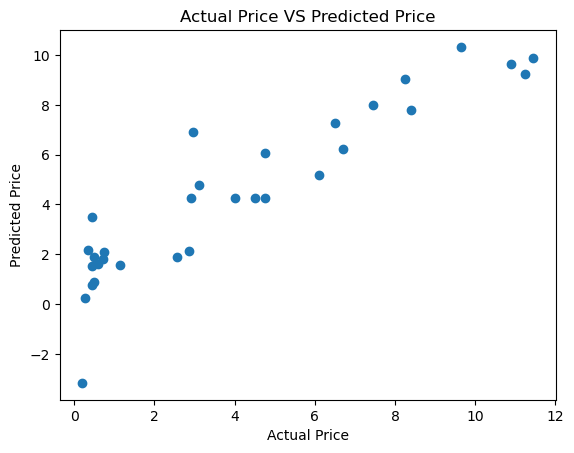

In [32]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price")
plt.show()

## Conclusion

<font color='red'>The Linear Regression model fits the selling price well with an approximate accuracy score of 84%</font> 